# Generalization Error
This code is implemented to to answer questions 1-3 in homework 4 of the Learning From Data course at Caltech: http://work.caltech.edu/homework/hw4.pdf

In problem 1-3, we look at generalization bounds numerically. For $N > d_{vc}$, use the simple approximate bound $N^{d_{vc}}$ for the growth function $m_\mathcal{H}(N)$.

## Question 1
For an $\mathcal{H}$ with $d_{vc} = 10$, if you want $95\%$ confidence that your generalization error is at most $0.05$, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
# initialize the parameters
dvc = 10
epsilon = 0.05
delta = 1 - 0.95

In [2]:
N = 10 # start point
cont = True # flag to check if N has converged
while cont:
    cont = False
    if N <= dvc:
        n = int(8 / epsilon**2 * math.log(4 * 2**N / delta))
    else:
        n = int(8 / epsilon**2 * math.log(4 * (2*N)**dvc / delta))
    if n != N:
        N = n
        cont = True

In [3]:
print('N has converged to: ', N)
print('Answer: D')

N has converged to:  452956
Answer: D


## Question 2 and 3
There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1 - \delta$. Fix $d_{vc} = 20$ and $\delta = 0.05$ and plot these bounds as a function of $N$. 

In [67]:
def originalVCBound(N, dvc, delta):
    if 2*N <= dvc:
        return (8 / N * math.log(4 * 2**(2*N) / delta))**0.5
    return (8 / N * math.log(4 * (2*N)**dvc / delta))**0.5

In [68]:
def rademacherPenaltyBound(N, dvc, delta):
    if N <= dvc:
        A = (2 * math.log(2 * N * 2**N) / N)**0.5
    else:
        A = (2 * math.log(2 * N * N**dvc) / N)**0.5
    B = (2 / N * math.log(1 / delta))**0.5
    C = 1 / N
    return A + B + C

In [82]:
def parrondoVanDenBroek(N, dvc, delta):
    res = 0.001
    cont = True
    while cont:
        cont = False
        if 2*N <= dvc:
            _res = (1 / N * (2 * res + math.log(6 * 2**(2*N) / delta)))**0.5            
        else:
            _res = (1 / N * (2 * res + math.log(6 * (2*N)**dvc / delta)))**0.5
        _res = round(_res, 3)
        if abs(res - _res) > 0.5:
            cont = True
        res = _res
    return res

In [83]:
def devroye(N, dvc, delta):
    res = 0.001
    cont = True
    while cont:
        cont = False
        if N*N <= dvc:
            _res = (1 / 2 / N * (4 * res * (1 + res) + math.log(4) + N*N*math.log(2) - math.log(delta)))**0.5
        else:
            _res = (1 / 2 / N * (4 * res * (1 + res) + math.log(4) + 2*dvc*math.log(N) - math.log(delta)))**0.5
        _res = round(_res, 3)
        if abs(res - _res) > 0.5:
            cont = True
        res = _res
    return res

In [85]:
dvc = 50
delta = 0.05
a = [originalVCBound(N, dvc, delta) for N in range(1, 10001)]
b = [rademacherPenaltyBound(N, dvc, delta) for N in range(1, 10001)]
c = [parrondoVanDenBroek(N, dvc, delta) for N in range(1, 10001)]
d = [devroye(N, dvc, delta) for N in range(1, 10001)]
idN = [N for N in range(1, 10001)]

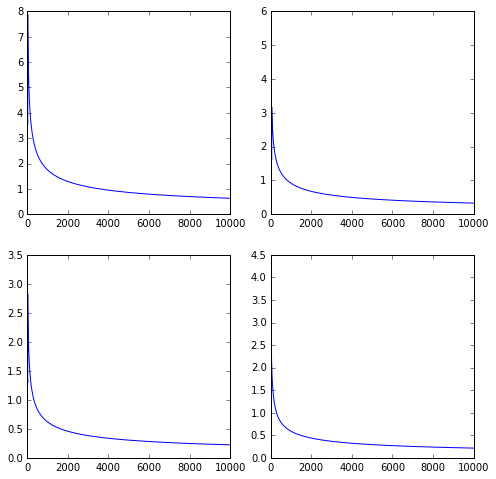

In [79]:
fig = plt.figure(figsize=(8,8))

# create subplot
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(idN, a)
ax2.plot(idN, b)
ax3.plot(idN, c)
ax4.plot(idN, d)

In [86]:
# Quesiton 2
N = 10000
print(a[N-1])
print(b[N-1])
print(c[N-1])
print(d[N-1])
print('Question 2: [d]')

0.632174915200836
0.3313087859616395
0.224
0.215
Question 2: [d]


In [88]:
# Question 3
N = 5
print(a[N-1])
print(b[N-1])
print(c[N-1])
print(d[N-1])
print('Question 3: [c]')

4.254597220000659
2.813654929686762
1.719
1.905
Question 3: [c]
